In [7]:
import sys
import numpy as np
import matplotlib.pylab as plt

sys.path.append('C:\\Users\\NTTRi LAB\\optical_matrix_multiplier')
from config.config_manager import ConfigManager
from systemcontroller import SystemController
from matrix_multiplier import OpticalMVM


# Load default configuration
default_sysconfig = ConfigManager.load_default_config()


sysconfig = default_sysconfig # basic system configuration

grid_config_slm1 = {
    "matrixsize_0": 20,
    "matrixsize_1": 30,
    "elem_width": 12, # 18
    "elem_height": 10,
    "topleft_x": 810,
    "topleft_y": 338,
    "gap_x": 6,
    "gap_y": 10
}
# 1280, 1920
grid_config_slm2 = {
    "matrixsize_0": 10,
    "matrixsize_1": 10,
    "elem_width": 8,
    "elem_height": 6,
    "topleft_x": 920,
    "topleft_y": 585,
    "gap_x": 2,
    "gap_y": 1
}


cam_config = {
        "bitDepth": 14,
        "ExposureTime": 10000,
        "Analog_gain": "High",
        "FPS": "30",
        "width": "160",
        "height": "296",
        "offset_x": "800",
        "offset_y": "460",
        "NUC_path": "C:\\Users\\NTTRi LAB\\optical_matrix_multiplier\\hardware\\NUCs\\NUC_10000us.yml"
    }

In [2]:
SC = SystemController(default_sysconfig)

Observer initialized
OSA is not connected.


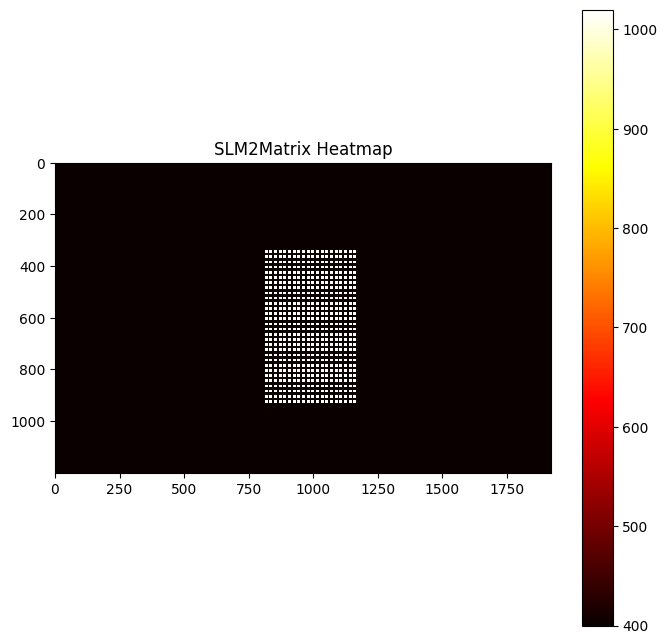

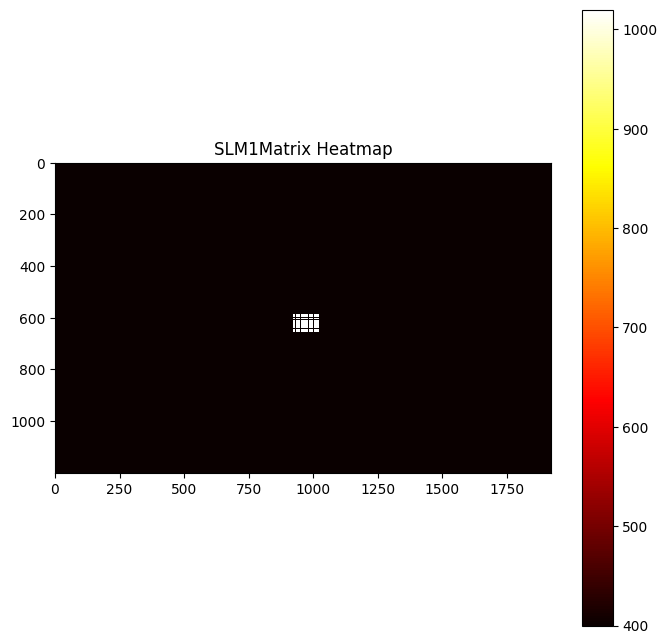

In [8]:
matrix1 = np.ones((30, 20))
matrix2 = np.ones((10, 10))

matrix1_phase = SC.slm1.get_phase_for_attenuation(matrix1)
matrix2_phase = SC.slm2.get_phase_for_attenuation(matrix2)
matrix_mask1 = SC.slm1.embed_matrix(matrix1_phase, grid_config_slm1, plot = True)
matrix_mask2 = SC.slm2.embed_matrix(matrix2_phase, grid_config_slm2, plot = True)

In [4]:
SC.camera.connectCam()

USB Camera Detected
Camera connected successfully.


True

In [5]:
cam_config = {
        "bitDepth": 14,
        "ExposureTime": 10000,
        "Analog_gain": "High",
        "FPS": "10",
        "width": "120",
        "height": "240",
        "offset_x": "676",
        "offset_y": "464",
        "NUC_path": "C:\\Users\\NTTRi LAB\\optical_matrix_multiplier\\hardware\\NUCs\\NUC_10000us.yml"
    }

SC.camera.update_config(cam_config)

Exposure time set to 10000 ms
analog gain set to High
Width set to 120
Height set to 240
X offset set to 676 pixels
Y offset set to 464 pixels
New NUC file set: C:\Users\NTTRi LAB\optical_matrix_multiplier\hardware\NUCs\NUC_10000us.yml
The following config successfully applied:
{
    "bitDepth": 14,
    "ExposureTime": 10000,
    "Analog_gain": "High",
    "FPS": "10",
    "width": "120",
    "height": "240",
    "offset_x": "676",
    "offset_y": "464",
    "NUC_path": "C:\\Users\\NTTRi LAB\\optical_matrix_multiplier\\hardware\\NUCs\\NUC_10000us.yml"
}


In [1]:
single_frame = SC.camera.captureFrames(2)[-1] #Capture 2 frames (this is minimum!) and return the last one

# Plot the image
fig, ax = plt.subplots()
cax = ax.imshow(single_frame, cmap='gray')
fig.colorbar(cax)
plt.title("Frame")
plt.show()

NameError: name 'SC' is not defined

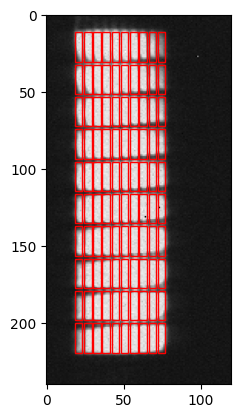

In [7]:
grid_config_img = {
        "matrixsize_0": 10,
        "matrixsize_1": 10,
        "elem_width": 5,
        "elem_height": 19,
        "topleft_x": 18,
        "topleft_y": 11,
        "gap_x": 1,
        "gap_y": 2}


SC.plot_rect_array(single_frame, grid_config_img)

In [8]:
omvm = OpticalMVM(SC, cam_config, grid_config_slm1, grid_config_slm2, grid_config_img)

USB Camera Detected
Camera connected successfully.
Exposure time set to 10000 ms
analog gain set to High
Width set to 120
Height set to 240
X offset set to 676 pixels
Y offset set to 464 pixels
New NUC file set: C:\Users\NTTRi LAB\optical_matrix_multiplier\hardware\NUCs\NUC_10000us.yml
The following config successfully applied:
{
    "bitDepth": 14,
    "ExposureTime": 10000,
    "Analog_gain": "High",
    "FPS": "10",
    "width": "120",
    "height": "240",
    "offset_x": "676",
    "offset_y": "464",
    "NUC_path": "C:\\Users\\NTTRi LAB\\optical_matrix_multiplier\\hardware\\NUCs\\NUC_10000us.yml"
}


In [9]:
SC.camera.clearFrames()
N_frames = 10
dark_data = omvm.capture_dark(N_frames)

print(dark_data)

Cleared all frames.
(240, 120)
[[0.0515765  0.05095741 0.0501721  0.05060144 0.05107262 0.05001869
  0.04989433 0.05096905 0.05046759 0.05118128]
 [0.05011043 0.05071425 0.05102959 0.04983279 0.050635   0.04957228
  0.05024163 0.05021266 0.04995029 0.05001347]
 [0.04985492 0.05073475 0.05014769 0.04895419 0.05020645 0.04951067
  0.04972149 0.05008051 0.04957228 0.0505462 ]
 [0.04984692 0.0497499  0.0501514  0.0503266  0.04988968 0.04933262
  0.04967815 0.04860651 0.04912102 0.04995386]
 [0.05030096 0.04982429 0.04984913 0.04971471 0.05024342 0.04926401
  0.04941151 0.04915508 0.0492471  0.04852319]
 [0.0504571  0.05090251 0.04950339 0.04948968 0.04996251 0.04953144
  0.04895341 0.04834536 0.04824699 0.05040583]
 [0.04960006 0.04967366 0.04980423 0.04898295 0.0486916  0.0494502
  0.04889279 0.04839484 0.04815418 0.04882696]
 [0.04962261 0.04948575 0.0494108  0.04927073 0.04895275 0.04911932
  0.049297   0.04916629 0.04862236 0.04890143]
 [0.0499608  0.04929279 0.04868526 0.04951667 0.04

In [10]:
bright = omvm.capture_bright()
print(bright)

[[0.33237275 0.41660896 0.45409265 0.45742023 0.46000385 0.4554182
  0.4418374  0.39698279 0.31751719 0.21520898]
 [0.30901673 0.40616754 0.45541751 0.46531549 0.46801341 0.46600229
  0.45549142 0.4137845  0.34944826 0.25647128]
 [0.29031312 0.40376836 0.46474493 0.47289199 0.46418655 0.467971
  0.45534298 0.43141314 0.37756079 0.29376727]
 [0.29222459 0.42029259 0.46230721 0.46715954 0.46426818 0.46788615
  0.45921734 0.44180134 0.40614954 0.33258545]
 [0.30093005 0.41995841 0.45443514 0.46180803 0.46296129 0.46616873
  0.46253139 0.44717014 0.42007148 0.36480364]
 [0.28956267 0.40390328 0.43788594 0.45567194 0.45909724 0.46854225
  0.46333778 0.44374755 0.42996943 0.38419098]
 [0.28453052 0.38433164 0.43869609 0.44919416 0.45975065 0.46720573
  0.46339887 0.4592379  0.43841401 0.40488759]
 [0.24848481 0.37655142 0.42900175 0.44764891 0.46098429 0.4699319
  0.46796963 0.46030831 0.44476655 0.41844594]
 [0.23981856 0.35963464 0.42729151 0.4462277  0.45686641 0.46870664
  0.4673439  0.4

In [13]:
calibration_mask_1, calibration_mask_2 = omvm.calibrate()

Calibration started:
[[ 0.01363487  0.01777559  0.01368742  0.0027369   0.00084833  0.00069884
   0.00103845  0.0006358  -0.00028014 -0.00010394]
 [ 0.01088155  0.01757284  0.01346603  0.0027082   0.00118187  0.00058883
   0.00037373  0.00056206  0.00077366  0.00039565]
 [ 0.00949801  0.01472915  0.01291511  0.00245855  0.00106043  0.00111755
   0.00046982  0.00105979  0.00055156  0.00069434]
 [ 0.0082531   0.01330134  0.01061955  0.00186358  0.00134186  0.00133479
   0.00052215  0.00108107  0.00052286  0.00010187]
 [ 0.00711478  0.01220342  0.01076569  0.00270163  0.001337    0.00052122
   0.0005652   0.00147957  0.00039165  0.00155246]
 [ 0.0059968   0.01010682  0.00846877  0.00255721  0.00083663  0.0005924
   0.00087746  0.00092458  0.00093172  0.00014142]
 [ 0.00625888  0.01013802  0.00830736  0.00237066  0.00055135  0.00113497
   0.00127475  0.00132615  0.00050987  0.00099169]
 [ 0.00443728  0.00842986  0.00669679  0.00146479  0.00025679  0.0008362
   0.00076002  0.00086054  0.001

In [14]:
# temp_c1 = calibration_mask_1
# exemption = (np.partition(temp_c1.flatten(), -2)[-2])
# # temp_c1 = temp_c1/exemption2
# print(temp_c1)
# print(exemption)
# temp_c1 = temp_c1/exemption
# print(temp_c1)
# idx_over1 = temp_c1>1
# print(idx_over1)
# temp_c1[idx_over1] = 1
# print(temp_c1)
# calibration_mask_1 = np.ones((10,10))
print(calibration_mask_1)
print(calibration_mask_2)

np.save('calibration_mask_1.npy', calibration_mask_1)
np.save('calibration_mask_2.npy', calibration_mask_2)
calibration_mask_1_modified = np.clip(calibration_mask_1*4, 0, 1)
print(calibration_mask_1_modified)
np.save('calibration_mask_1_.npy', calibration_mask_1_modified)

[[0.35100802 0.28334406 0.2723608  0.18338131 0.20545233 0.14807072
  0.13082993 0.21294653 0.24414551 0.28649414]
 [0.22762729 0.2442779  0.18159485 0.1572943  0.18155409 0.1930841
  0.21195937 0.22244989 0.22895172 0.31534826]
 [0.46264974 0.17525716 0.21674777 0.19393954 0.16767422 0.19217949
  0.18637946 0.26773687 0.24974027 0.32079076]
 [0.4227419  0.23967985 0.15618213 0.22629825 0.14259582 0.14022632
  0.15838827 0.18952178 0.25001684 0.23502502]
 [0.6656846  0.27843386 0.19020151 0.2589443  0.19023166 0.16330422
  0.22609661 0.36209314 0.24583182 0.91763558]
 [0.55324301 0.30236267 0.2113809  0.17833145 0.19946859 0.16163915
  0.20571954 0.23558655 0.34331307 0.26145477]
 [0.33862589 0.41262782 0.20152366 0.18286521 0.17772026 0.14593289
  0.14927971 0.188725   0.18812286 0.32430575]
 [1.         0.24587417 0.23910749 0.1944761  0.20767472 0.13120975
  0.22242999 0.20743655 0.2823671  0.53451184]
 [0.35045122 0.31377993 0.19589479 0.16341514 0.15502882 0.1389525
  0.19956067 0

In [15]:
uniform = omvm.multiply((calibration_mask_1_modified), (calibration_mask_2))
print(uniform-dark_data)

[[0.17710727 0.26759875 0.29670351 0.28288801 0.27807022 0.25761987
  0.24870789 0.20832543 0.14777381 0.0959462 ]
 [0.13802297 0.22302071 0.27142984 0.27971935 0.28299839 0.26011265
  0.25611569 0.20999032 0.15512367 0.10948306]
 [0.11575963 0.21482421 0.28149133 0.28747475 0.26315043 0.25402157
  0.25806742 0.21774393 0.17160434 0.12268147]
 [0.11409902 0.23493801 0.27709732 0.26647161 0.26432177 0.25773153
  0.26182061 0.23241071 0.19133618 0.14145637]
 [0.12035925 0.22730766 0.25196372 0.26313141 0.27178745 0.25471541
  0.27518943 0.25780944 0.21838655 0.17022214]
 [0.10788869 0.19842205 0.23432165 0.25198203 0.26715313 0.25433557
  0.2812534  0.27172839 0.24220686 0.18553456]
 [0.10809293 0.17242884 0.2318414  0.23972904 0.26237795 0.26840942
  0.29252589 0.30174346 0.26897811 0.20857337]
 [0.08869921 0.16641519 0.21121367 0.23667201 0.2639409  0.28435601
  0.31219576 0.31602997 0.29116184 0.22730656]
 [0.08637695 0.15657018 0.19798317 0.23465596 0.26072476 0.28831606
  0.3286063 

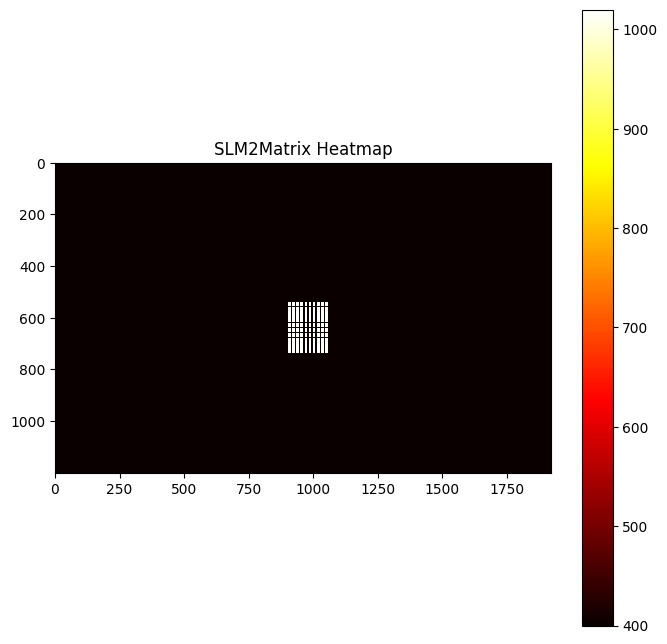

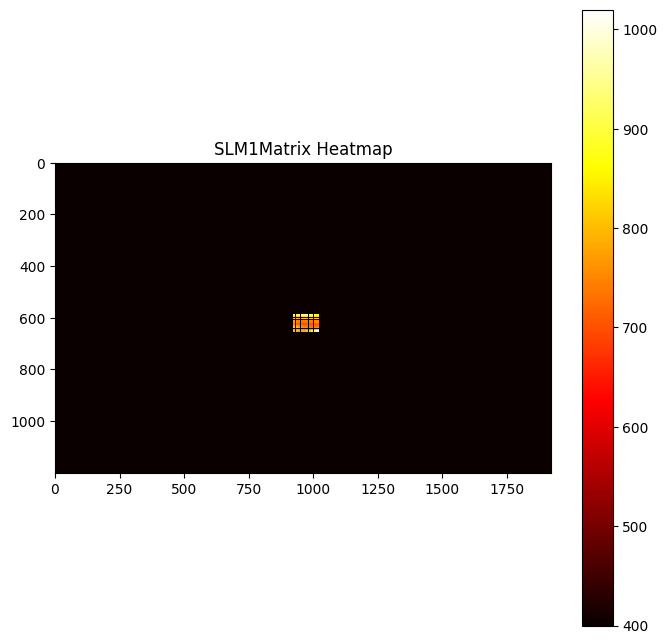

In [54]:
matrix1_phase_c = SC.slm1.get_phase_for_attenuation(calibration_mask_1)
matrix2_phase_c = SC.slm2.get_phase_for_attenuation(calibration_mask_2)
matrix_mask1_c = SC.slm1.embed_matrix(matrix1_phase_c, grid_config_slm1, plot = True)
matrix_mask2_c = SC.slm2.embed_matrix(matrix2_phase_c, grid_config_slm2, plot = True)

In [22]:
tensor_2 = omvm.tensor_2

In [23]:
print(calibration_mask_1*M1[0,:,:])
print(calibration_mask_1)


NameError: name 'M1' is not defined

In [30]:
M1 = np.ones((1,10,10))
M2 = np.load('C:\\Users\\NTTRi LAB\\Desktop\\MVM\\2D\\M2_10x10_40_4bit.npy')

In [31]:
NumMatrices_M1 = M1.shape[0]
NumMatrices_M2 = M2.shape[0]
Data = np.empty((NumMatrices_M1, NumMatrices_M2, 10, 10))

for m1_idx in range(NumMatrices_M1) :
       for m2_idx in range(NumMatrices_M2):
           print("Matrix #: ", str(m2_idx), "/", str(NumMatrices_M2))
           Data[m1_idx, m2_idx,:,:] =  omvm.multiply(calibration_mask_1_modified*M1[m1_idx,:,:], calibration_mask_2*(M2[m2_idx,:,:].T))

np.save('results.npy', Data)

Matrix #:  0 / 604
C:\Users\NTTRi LAB\optical_matrix_multiplier\csv_files\csvfile1.csv
C:\Users\NTTRi LAB\optical_matrix_multiplier\csv_files\csvfile2.csv
Matrix #:  1 / 604
C:\Users\NTTRi LAB\optical_matrix_multiplier\csv_files\csvfile1.csv
C:\Users\NTTRi LAB\optical_matrix_multiplier\csv_files\csvfile2.csv
Matrix #:  2 / 604
C:\Users\NTTRi LAB\optical_matrix_multiplier\csv_files\csvfile1.csv
C:\Users\NTTRi LAB\optical_matrix_multiplier\csv_files\csvfile2.csv
Matrix #:  3 / 604
C:\Users\NTTRi LAB\optical_matrix_multiplier\csv_files\csvfile1.csv
C:\Users\NTTRi LAB\optical_matrix_multiplier\csv_files\csvfile2.csv
Matrix #:  4 / 604
C:\Users\NTTRi LAB\optical_matrix_multiplier\csv_files\csvfile1.csv
C:\Users\NTTRi LAB\optical_matrix_multiplier\csv_files\csvfile2.csv
Matrix #:  5 / 604
C:\Users\NTTRi LAB\optical_matrix_multiplier\csv_files\csvfile1.csv
C:\Users\NTTRi LAB\optical_matrix_multiplier\csv_files\csvfile2.csv
Matrix #:  6 / 604
C:\Users\NTTRi LAB\optical_matrix_multiplier\csv_fi

In [32]:
dark_datas = omvm.dark_data
np.save('dark_datas.npy', dark_datas)

In [33]:
uniform_datas = omvm.multiply(calibration_mask_1_modified,calibration_mask_2)
np.save('uniform_datas.npy', uniform_datas)

C:\Users\NTTRi LAB\optical_matrix_multiplier\csv_files\csvfile1.csv
C:\Users\NTTRi LAB\optical_matrix_multiplier\csv_files\csvfile2.csv
